<a href="https://colab.research.google.com/github/Lrs-mtos/song-popularity-ML/blob/develop_adrian/song_popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Get the data

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "Https://www.kaggle.com/api/v1/datasets/download/joebeachcapital/30000-spotify-songs"
SONG_PATH = os.path.join("datasets", "spotify")

def fetch_song_data(song_url=DOWNLOAD_ROOT, song_path=SONG_PATH):
    csv_path = os.path.join(song_path, "spotify_songs.csv")
    if os.path.exists(csv_path):
        songs = pd.read_csv(csv_path)
    else:
        print("CSV file not found.")


In [ ]:
tgz_path = os.path.join(SONG_PATH, "spotify-songs.tgz")
print(f"Tamanho do arquivo: {os.path.getsize(tgz_path)} bytes")

Tamanho do arquivo: 4096 bytes


In [ ]:
fetch_song_data()

## Load a CSV File into a Pandas DataFrame

In [ ]:
def load_song_data(song_path=SONG_PATH):
    csv_path = os.path.join(song_path, "spotify_songs.csv")
    return pd.read_csv(csv_path)

## Take a Quick Look at the Data Structure

In [ ]:
songs = load_song_data()
songs.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
songs["danceability"].value_counts()

,count
danceability,
0.733,118
0.708,115
0.704,112
0.694,112
0.784,111
...,...
0.202,1
0.172,1
0.261,1


In [ ]:
songs.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


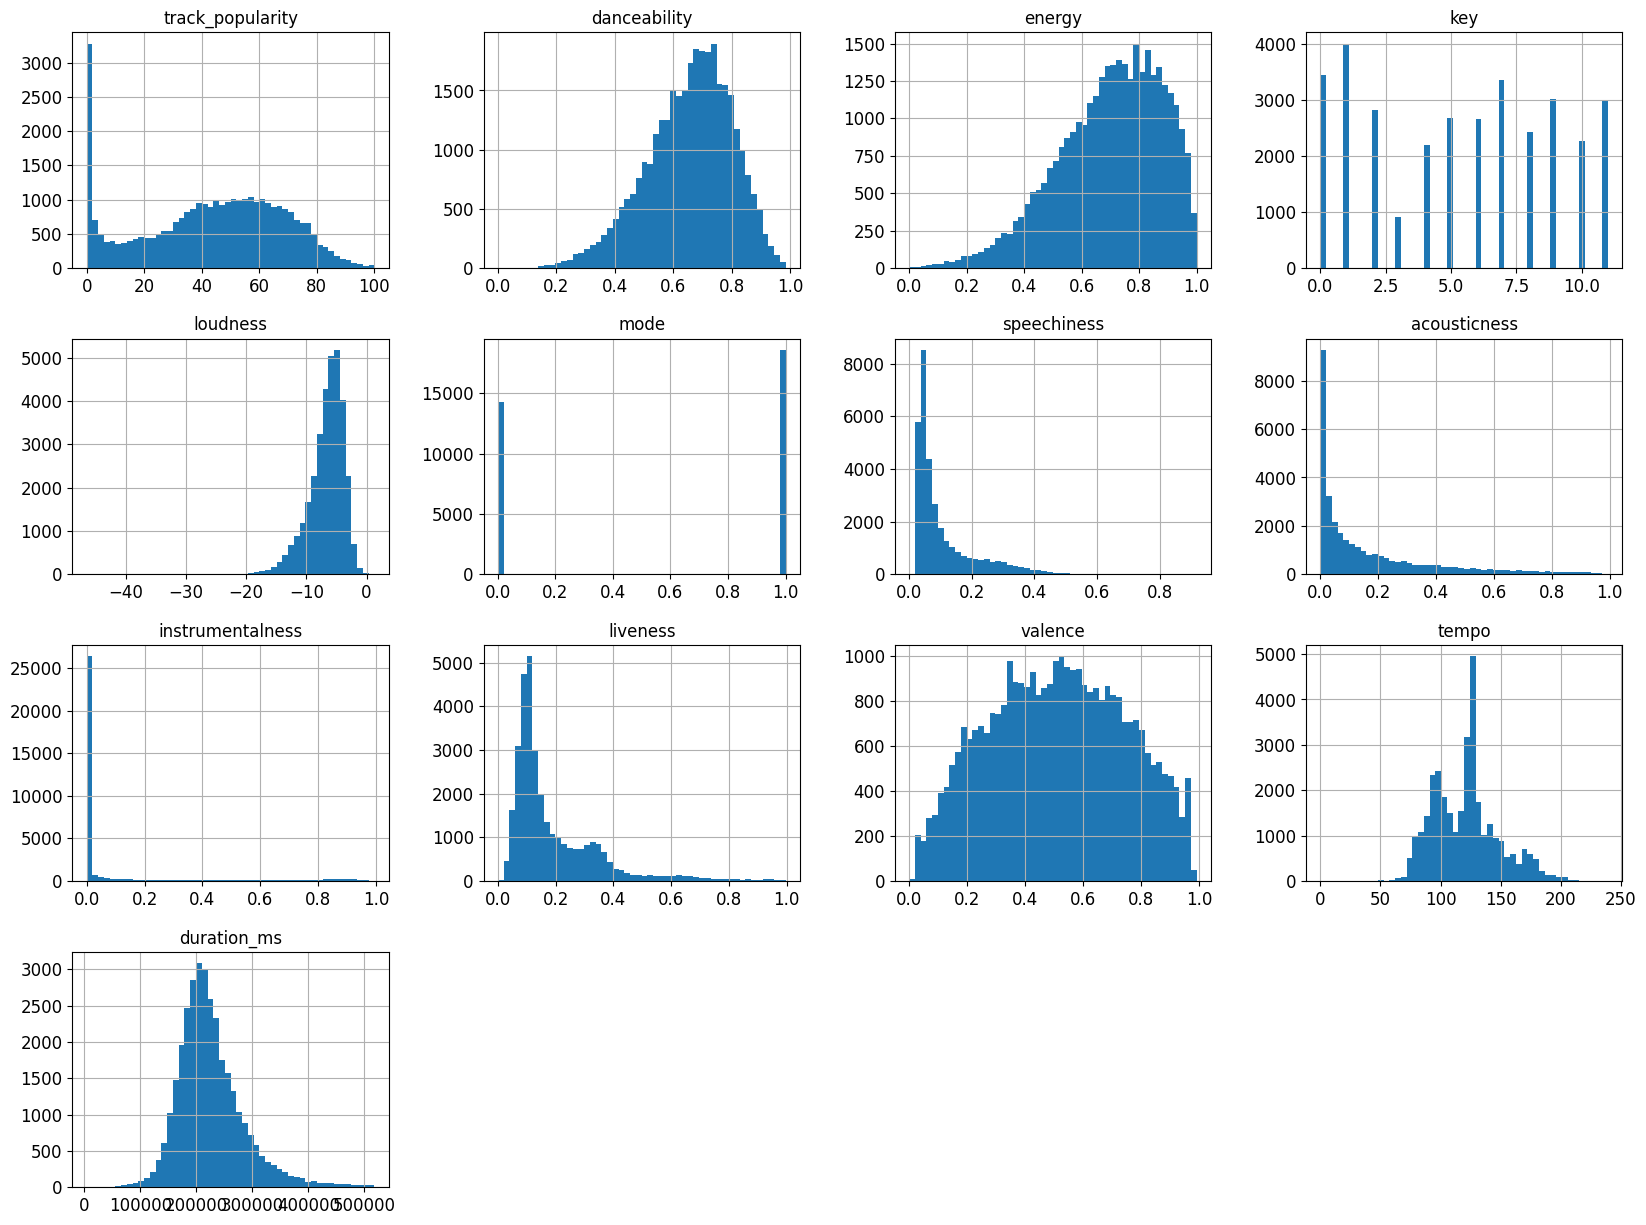

In [ ]:
import matplotlib.pyplot as plt
songs.hist(bins=50, figsize=(20,15))
plt.show()

## Create a Set Test

In [ ]:
#to make this notebook's output identical at every run
np.random.seed(42)

In [ ]:
import numpy as np# Use train_test_split to split the data into a training set and a test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(songs, test_size=0.2, random_state=42)
len(train_set)

26266

In [ ]:
len(test_set)

6567

##Create a functions

In [58]:
def one_hot_top_artists(df, n):
    if 'track_artist' not in df.columns or 'track_popularity' not in df.columns:
        raise ValueError("O dataset deve conter as colunas 'track_artist' e 'track_popularity'.")

    # Calcula a popularidade média por artista(Observações a se fazer)
    artist_popularity = df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False)

    # Seleciona os `n` artistas mais populares
    top_artists = artist_popularity.head(n).index.tolist()
    print("Top artistas:", top_artists)  # Verifique os artistas mais populares

    # Cria colunas one-hot para esses n artistas
    for artist in top_artists:
        df[f"{artist}"] = (df['track_artist'] == artist).astype(int)

    return df


In [57]:
#removendo as musicas repetidas
songs = songs.drop_duplicates(subset=['track_artist', 'track_name'])

#obtendo os n artistas mais populares do dataset
n = 5  # Quantidade de artistas mais populares
songs = one_hot_top_artists(songs, n)

#TESTES
#5 musicas mais pupulares
top_5_songs = songs[['track_name', 'track_popularity']].sort_values(by='track_popularity', ascending=False).head(5)
print(top_5_songs)

# Lista de artistas desejados
desired_artists = ['Trevor Daniel', 'Y2K', 'Ant Saunders', 'Don Toliver', 'Kina']
# Listas das musicas desses artistas
filtered_songs = songs[songs['track_artist'].isin(desired_artists)][['track_name','track_artist','track_album_name', 'track_popularity']]
pd.set_option('display.max_rows', None)  # Garante que todas as linhas sejam exibidas
print(filtered_songs)


Top artistas: ['Trevor Daniel', 'Y2K', 'Ant Saunders', 'Don Toliver', 'Kina']
           track_name  track_popularity
5508          The Box                98
716   Blinding Lights                98
711          Memories                98
687              Tusa                98
1302  Don't Start Now                97
                              track_name   track_artist  \
1224                       Yellow Hearts   Ant Saunders   
1324                              Lalala            Y2K   
3083       Get You The Moon (feat. Snøw)           Kina   
3155                             Falling  Trevor Daniel   
5533                             No Idea    Don Toliver   
5555   HAD ENOUGH (feat. Quavo & Offset)    Don Toliver   
18378               Can We Kiss Forever?           Kina   

                    track_album_name  track_popularity  
1224                   Yellow Hearts                89  
1324                          Lalala                91  
3083   Get You The Moon (feat. Snøw)  

In [60]:
#retorna todos os artistas e suas popularidades em ordem decrescente
def get_artists_and_popularity(df):
    # Verifica se as colunas necessárias existem no DataFrame
    if 'track_artist' not in df.columns or 'track_popularity' not in df.columns:
        raise ValueError("O dataset deve conter as colunas 'track_artist' e 'track_popularity'.")

    # Calcula a popularidade média por artista
    artist_popularity = df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False)

    # Retorna o DataFrame com o nome do artista e sua popularidade média
    return artist_popularity.reset_index()

In [61]:
artists_and_popularity = get_artists_and_popularity(songs)
print("Lista de artistas e sua popularidade:")
print(artists_and_popularity)

Lista de artistas e sua popularidade:
                                            track_artist  track_popularity
0                                          Trevor Daniel         97.000000
1                                                    Y2K         91.000000
2                                           Ant Saunders         89.000000
3                                            Don Toliver         87.500000
4                                                   Kina         85.500000
5                                               JACKBOYS         84.333333
6                                           Dadá Boladão         84.000000
7                                            Roddy Ricch         84.000000
8                                                 DaBaby         83.666667
9                                         Internet Money         83.000000
10                                             Baby Keem         83.000000
11                                        Olivia Rodrigo      